# 모델 평가

In [2]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

features = digits.data

target = digits.target

standardizer = StandardScaler()

logit = LogisticRegression()

pipeline = make_pipeline(standardizer, logit)

kf = KFold(n_splits = 10, shuffle = True, random_state = 1)

cv_results = cross_val_score(pipeline,features,target,cv = kf,scoring = 'accuracy',n_jobs = -1)

cv_results.mean()

0.9693916821849783

In [3]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [4]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, targat_test = train_test_split(features,target,test_size = 0.1, random_state = 1)

In [5]:
standardizer.fit(features_train)

features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [6]:
pipeline = make_pipeline(standardizer,logit)

In [7]:
cv_results = cross_val_score(pipeline,features,target,cv = kf, scoring = 'accuracy',n_jobs = -1)

In [9]:
cv_results.mean()

0.9693916821849783

In [10]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits = 10, train_size = 0.5, test_size = 0.2, random_state = 42)
cv_results = cross_val_score(pipeline,features,target,cv =ss, scoring= 'accuracy',n_jobs = -1)

cv_results.mean()

0.9630555555555554

In [15]:
from sklearn.model_selection import RepeatedKFold

rfk = RepeatedKFold(n_splits= 10, n_repeats = 30, random_state = 42)

cv_results = cross_val_score(pipeline,features,target,cv= rfk,scoring = 'accuracy',n_jobs = -1)

len(cv_results)

300

In [16]:
cv_results.mean()

0.9702306021104903

### 기본 회귀 모델 만들기

In [17]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

boston = load_boston()

features, target = boston.data, boston.target

features_train, features_test, target_train, target_test = train_test_split(features,target,random_state = 0)

dummy = DummyRegressor(strategy = 'mean')

dummy.fit(features_train,target_train)

dummy.score(features_test, target_test)

-0.001119359203955339

In [18]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(features_train, target_train)

ols.score(features_test,target_test)

0.6354638433202128

### 기본 분류 모델 만들기

In [20]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

features, target = iris.data,iris.target

features_train, features_test, target_train, target_test = train_test_split(features,target,random_state = 0)

dummy = DummyClassifier(strategy = 'uniform', random_state = 1)

dummy.fit(features_train, target_train)

dummy.score(features_test,target_test)

0.42105263157894735

In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(features_train,target_train)

classifier.score(features_test, target_test)

0.9736842105263158

### 이진 분류기의 예측 평가하기

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X,y = make_classification(n_samples = 10000, n_features = 3, n_informative = 3, n_redundant = 0, n_classes = 2, random_state = 1)

logit = LogisticRegression()

cross_val_score(logit,X,y,scoring= 'accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [28]:
cross_val_score(logit, X, y, scoring = 'precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [29]:
cross_val_score(logit, X, y, scoring = 'recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [30]:
cross_val_score(logit,X,y,scoring = 'f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 1)

y_hat = logit.fit(X_train,y_train).predict(X_test)

accuracy_score(y_test,y_hat)

0.947

In [32]:
from sklearn.model_selection import cross_validate

cross_validate(logit,X,y,scoring = ['accuracy','precision'])

{'fit_time': array([0.01296496, 0.01093245, 0.01293778, 0.01192856, 0.0124166 ]),
 'score_time': array([0.00203228, 0.0020237 , 0.002033  , 0.00199437, 0.00099802]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

### 이진 분류기 임곗값 평가하기

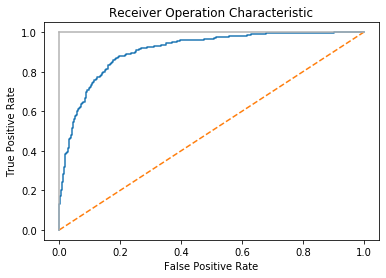

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

features, target = make_classification(n_samples = 10000, n_features = 10, n_classes = 2, n_informative = 3, random_state = 3)

features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.1, random_state = 1)

logit = LogisticRegression()

logit.fit(features_train,target_train)

target_probabilities = logit.predict_proba(features_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

plt.title('Receiver Operation Characteristic')
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c='.7'),plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [38]:
logit.classes_

array([0, 1])

In [39]:
print('임계값:',threshold[116])
print('진짜 양성 비율:',true_positive_rate[116])
print('가짜 양성 비율:',false_positive_rate[116])

임계값: 0.5331715230155316
진짜 양성 비율: 0.810204081632653
가짜 양성 비율: 0.14901960784313725


In [40]:
print('임계값:',threshold[45])
print('진짜 양성 비율:',true_positive_rate[45])
print('가짜 양성 비율:',false_positive_rate[45])

임계값: 0.8189133876659292
진짜 양성 비율: 0.5448979591836735
가짜 양성 비율: 0.047058823529411764


In [42]:
roc_auc_score(target_test,target_probabilities)

0.9073389355742297

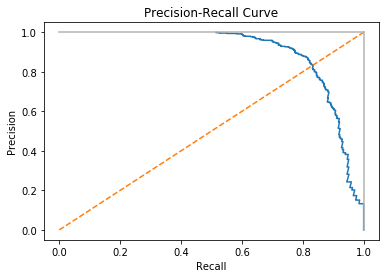

In [43]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(target_test,target_probabilities)

plt.title("Precision-Recall Curve")
plt.plot(precision,recall)
plt.plot([0,1],ls = '--')
plt.plot([1,1], c='.7'), plt.plot([1,1],[1,0], c='.7')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [44]:
from sklearn.metrics import average_precision_score

average_precision_score(target_test, target_probabilities)

0.8984128719848977

In [46]:
cross_validate(logit, features, target, scoring = ['roc_auc','average_precision'])

{'fit_time': array([0.01562214, 0.01562142, 0.        , 0.        , 0.02573633]),
 'score_time': array([0.        , 0.        , 0.01562142, 0.        , 0.00199485]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])}

### 다중클래스 분류기 예측 평가하기

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

features, target = make_classification(n_samples = 10000, n_features = 3, n_informative = 3,n_redundant = 0, n_classes = 3, random_state = 1)

logit = LogisticRegression()

cross_val_score(logit, features,target, scoring = 'accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [50]:
cross_val_score(logit,features,target,scoring = 'f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

### 분류기 성능 시각화하기

C:\Users\jlee0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


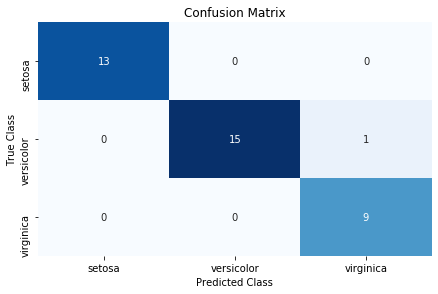

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd 

iris = datasets.load_iris()
features = iris.data

target = iris.target

class_names = iris.target_names

features_train,features_test,target_train,target_test = train_test_split(features,target,random_state = 1)

classifier = LogisticRegression()

target_predicted = classifier.fit(features_train, target_train).predict(features_test)

matrix = confusion_matrix(target_test, target_predicted)

dataframe = pd.DataFrame(matrix, index = class_names, columns = class_names)

sns.heatmap(dataframe, annot = True, cbar = None, cmap = 'Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

### 회귀모델 평가하기

In [53]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

features, target = make_regression(n_samples = 100, n_features = 3, n_informative = 3, n_targets = 1, noise = 50, coef = False, random_state = 1)
ols = LinearRegression()

cross_val_score(ols, features, target, scoring = 'neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [54]:
cross_val_score(ols, features, target, scoring = 'r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

### 군집 모델 평가하기

In [55]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples = 1000, n_features = 10, centers= 2, cluster_std = 0.5, shuffle = True, random_state = 1)

model = KMeans(n_clusters = 2, random_state = 1).fit(features)
target_predicted = model.labels_

silhouette_score(features,target_predicted)

0.8916265564072142

### 사용자 정의 평가 지표 만들기

In [57]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

features, target = make_regression(n_samples = 100, n_features= 3,random_state = 1)

features_train, features_test, target_train,target_test = train_test_split(features, target, test_size = 0.10, random_state = 1)

def custom_metric(traget_test, target_predicted):
    r2 = r2_score(target_test,target_predicted)
    
    return r2

score = make_scorer(custom_metric, greater_is_better = True)

classifier = Ridge()

model = classifier.fit(features_train, target_train)

score(model, features_test, target_test)

0.9997906102882058

In [58]:
target_predicted = model.predict(features_test)

r2_score(target_test, target_predicted)

0.9997906102882058

### 훈련 세트 크기에 따른 영향을 시각화 하기

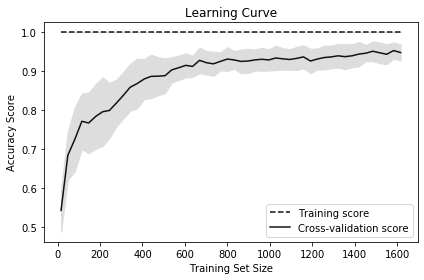

In [62]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits()

features, target = digits.data, digits.target

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),features, target, cv = 10, scoring = 'accuracy' ,n_jobs = -1, train_sizes = np.linspace(0.01,1.0,50))

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis= 1)

plt.plot(train_sizes, train_mean, '--',color = '#111111',label = 'Training score')
plt.plot(train_sizes, test_mean, color = '#111111',label = 'Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean+ train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean+ test_std, color = '#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Set Size'), plt.ylabel('Accuracy Score'),
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 평가 지표 리포트 만들기

In [63]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()

features = iris.data

target = iris.target

class_names = iris.target_names

features_train, features_test,target_train,target_test = train_test_split(features,target,random_state = 1)

classifier = LogisticRegression()

model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

print(classification_report(target_test,target_predicted, target_names = class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



C:\Users\jlee0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 하이퍼파라미터 값의 영향을 시각화하기

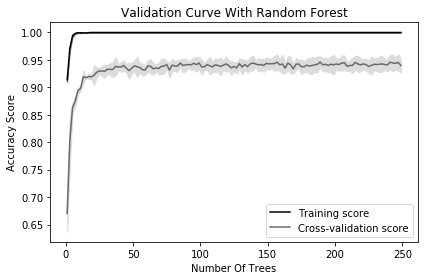

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

digits = load_digits()
features,target = digits.data, digits.target

param_range = np.arange(1,250,2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),features, target, param_name = 'n_estimators',param_range = param_range, cv =3 , scoring = 'accuracy', n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis =1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis =1)

plt.plot(param_range, train_mean, label = 'Training score', color = 'black')
plt.plot(param_range, test_mean, label = 'Cross-validation score', color = 'dimgrey')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color = 'gray')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color = 'gainsboro')

plt.title('Validation Curve With Random Forest')
plt.xlabel('Number Of Trees')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()